In [1]:
import sys
sys.path.append('D:\PyCharmProjects\VFPUMC02')
sys.path.append(r'C:\Users\Administrator\PycharmProjects\VFPUMC02')
%load_ext autoreload
%autoreload 2

In [27]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from utils.DataProcessUtils import split_data_into_labeled_and_unlabeled
from classfiers.TwoStep import TwoStep

In [3]:
X, y = make_regression(n_samples=1000, n_features=50)

In [4]:
y_orig = y.copy()
X_L, y_L, X_U, y_U_orig = split_data_into_labeled_and_unlabeled(X,y,hidden_rate = 0.3)

数据分割完成！
总样本数: 1000
隐藏比例: 0.30 (隐藏样本数: 300)
有标签样本数 (X_L, y_L): 700
无标签样本数 (X_U): 300
无标签样本的原始标签数 (y_U_orig): 300

数据格式示例:
X_L shape: (700, 50), y_L shape: (700,)
X_U shape: (300, 50), y_U_orig shape: (300,)

有标签样本 (前5个):
X_L[:5]:
[[ 2.55433022e-01  3.18979858e-01  1.84498140e+00 -9.29026343e-01
   3.47605364e-01 -5.28080347e-01  1.47142828e-01  7.20847887e-01
   2.30180098e-01  5.84780064e-01 -6.17660055e-01  6.80932497e-01
  -1.16599153e+00 -1.44192634e+00  9.07759384e-02 -1.50060573e+00
   2.60614013e-01 -1.21832943e+00 -1.77878764e+00  1.41078356e+00
   1.93409395e-01 -1.45538000e+00 -8.14717775e-01 -1.52570832e-01
   1.14659918e+00  1.00566465e+00  1.82393968e-01 -1.31752384e+00
   5.82375180e-01  8.21128265e-02 -9.03538886e-01  1.08219694e+00
  -2.44395180e-01 -1.05306786e+00 -6.80909883e-01 -1.86072090e-01
   2.64035989e+00 -4.16397308e-01  2.85953860e-02 -4.18659207e-01
  -5.07897925e-01  2.17237462e-03 -9.13320345e-01 -5.90661400e-01
   3.42186109e-01  5.60123824e-01 -1.21218610

In [31]:
# 初始化 GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=100,  # 弱学习器的数量
    learning_rate=0.1,  # 学习率
    max_depth=3,  # 每棵树的最大深度
    random_state=42  # 随机种子
)
linr = LinearRegression()

In [32]:
two_step = TwoStep(
    base_classifier=None,
    base_regressor=linr,
    max_iter=100,
    k=0.1
)

2025-01-07 18:44:42,818 - INFO - TwoStep 类已初始化: max_iter=100, k=0.10, base_classifier=NoneType, base_regressor=LinearRegression


In [33]:
two_step.fit(X_L, y_L, X_U)

2025-01-07 18:44:45,150 - INFO - 有标签数据 (L): 700 样本
2025-01-07 18:44:45,151 - INFO - 无标签数据 (U): 300 样本
2025-01-07 18:44:45,152 - INFO - 任务类型判定结果: regression
2025-01-07 18:44:45,152 - INFO - 这是一个回归任务。
2025-01-07 18:44:45,153 - INFO - 回归任务标签统计: 最小值=-529.3383, 最大值=581.2538, 平均值=11.2803, 标准差=171.0523
2025-01-07 18:44:45,154 - INFO - 初始化预测结果数组，长度=300
2025-01-07 18:44:45,155 - INFO - 开始自训练迭代，共计划进行 100 次迭代
2025-01-07 18:44:45,155 - INFO - ===== 第 0 次迭代开始 =====
2025-01-07 18:44:45,156 - INFO - 当前 Labeled 数据量: 700；Unlabeled 数据量: 300
2025-01-07 18:44:45,158 - INFO - 开始训练回归器 (基于 700 个样本)...
2025-01-07 18:44:45,162 - INFO - 回归器训练完成，耗时 0.00 秒。
2025-01-07 18:44:45,163 - INFO - 开始对 Unlabeled 数据进行置信度打分...
2025-01-07 18:44:45,164 - INFO - 完成置信度打分，耗时 0.00 秒。
2025-01-07 18:44:45,165 - INFO - 选取前 10.00% 的高置信度样本。
2025-01-07 18:44:45,166 - INFO - 本轮选出高置信度样本数量: 30，占比约为 10.00%
2025-01-07 18:44:45,167 - INFO - 对选中的高置信度样本进行预测标签。
2025-01-07 18:44:45,168 - INFO - 将高置信度样本合并到 Labeled 集。
2025-01-07 18:44:45,169 - INF

In [34]:
u_pred = two_step.get_unlabled_predict()

In [35]:
u_pred

array([ 5.21976902e+01,  7.73505207e+01,  8.12021325e+01,  1.23006908e+01,
       -1.82842212e+02, -2.38420834e+02,  6.45270798e+00,  1.21263317e+02,
       -1.54186303e+02, -2.37503608e+02,  4.28725450e+01, -2.50612028e+02,
        1.62385659e+01,  9.88720960e+01, -9.87831306e+01, -1.37962075e+01,
       -3.69409292e+02, -1.19620308e+02, -1.45250607e+02, -6.81864972e+01,
       -7.31296140e+01,  2.27564652e+02, -2.85415945e+02, -4.53066716e+01,
       -9.13258008e+01, -3.64026191e+01,  1.91652960e+01, -4.24758773e+01,
       -1.96652961e+02,  2.50628447e+02, -1.88183821e+02,  1.64664647e+02,
        4.35997922e+01, -8.95539419e+01,  2.66983215e+02,  3.88051701e+02,
        1.15741535e+02, -1.42001280e+02,  1.98140882e+02,  1.35505772e+02,
       -3.00048941e+02,  1.24328589e+02, -1.98794534e+02,  3.58547978e+01,
       -1.22698455e+02,  1.08767310e+02,  7.17987941e+01, -6.40059643e+01,
       -1.39480884e+02, -1.10977684e+02, -2.35116506e+02, -9.92925179e+00,
       -2.28339329e+02,  

In [36]:
y_U_orig

array([ 5.21976902e+01,  7.73505207e+01,  8.12021325e+01,  1.23006908e+01,
       -1.82842212e+02, -2.38420834e+02,  6.45270798e+00,  1.21263317e+02,
       -1.54186303e+02, -2.37503608e+02,  4.28725450e+01, -2.50612028e+02,
        1.62385659e+01,  9.88720960e+01, -9.87831306e+01, -1.37962075e+01,
       -3.69409292e+02, -1.19620308e+02, -1.45250607e+02, -6.81864972e+01,
       -7.31296140e+01,  2.27564652e+02, -2.85415945e+02, -4.53066716e+01,
       -9.13258008e+01, -3.64026191e+01,  1.91652960e+01, -4.24758773e+01,
       -1.96652961e+02,  2.50628447e+02, -1.88183821e+02,  1.64664647e+02,
        4.35997922e+01, -8.95539419e+01,  2.66983215e+02,  3.88051701e+02,
        1.15741535e+02, -1.42001280e+02,  1.98140882e+02,  1.35505772e+02,
       -3.00048941e+02,  1.24328589e+02, -1.98794534e+02,  3.58547978e+01,
       -1.22698455e+02,  1.08767310e+02,  7.17987941e+01, -6.40059643e+01,
       -1.39480884e+02, -1.10977684e+02, -2.35116506e+02, -9.92925179e+00,
       -2.28339329e+02,  

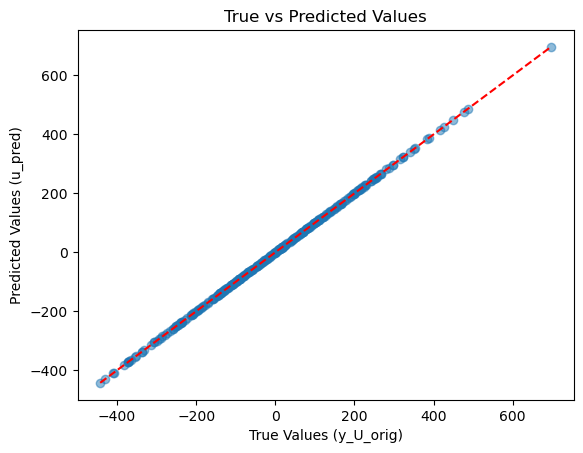

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_U_orig, u_pred, alpha=0.5)
plt.plot([min(y_U_orig), max(y_U_orig)], [min(y_U_orig), max(y_U_orig)], color='red', linestyle='--')
plt.xlabel("True Values (y_U_orig)")
plt.ylabel("Predicted Values (u_pred)")
plt.title("True vs Predicted Values")
plt.show()


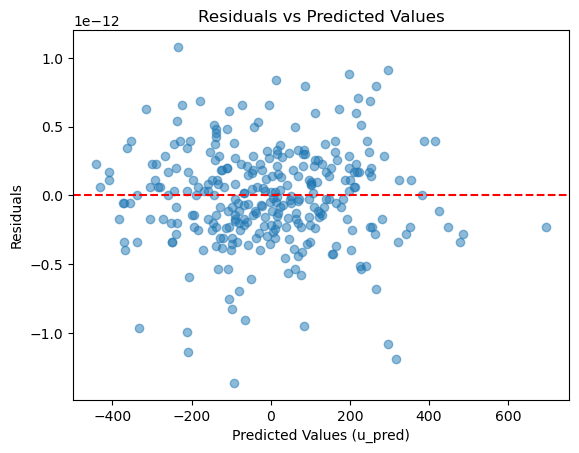

In [38]:
residuals = y_U_orig - u_pred
plt.scatter(u_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values (u_pred)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_U_orig, u_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 1.304919615101758e-25


---

In [16]:
gbr = GradientBoostingRegressor(
    n_estimators=100,  # 弱学习器的数量
    learning_rate=0.1,  # 学习率
    max_depth=3,  # 每棵树的最大深度
    random_state=42  # 随机种子
)

In [17]:
gbr.fit(X_L,y_L)

GradientBoostingRegressor(random_state=42)

In [18]:
upred2 = gbr.predict(X_U)

In [19]:
upred2

array([  40.41328377,   53.05501059,   38.49496664,   -8.89087836,
       -154.90362001, -197.43840305,   21.87542047,  112.899344  ,
       -117.21910954, -178.60741334,   16.30504396, -164.99561502,
        -28.00607919,  162.7472205 ,  -71.23307959,  -18.74209341,
       -267.37314752, -138.16272373,  -42.67378018,  -81.45988899,
        -40.67210759,  178.96952349, -236.10965837,    2.33084086,
        -94.74577746,  -47.77509765,   27.26234885,  -36.96606857,
       -139.57949783,  213.13096922, -117.58653974,  140.76650649,
          4.65880358, -108.43582132,  220.2500713 ,  276.37220546,
        134.52740305, -144.03463285,  183.70264522,  109.59107677,
       -270.32309942,  152.51505999, -145.84477923,   51.18619946,
        -49.87533192,   42.65465159,   38.31921094,  -20.10302409,
       -142.39696338,  -35.10776139, -164.81402463,  -10.01022761,
       -231.34874846,  121.00969654,   24.19934385, -135.76352073,
        219.95783349,  290.18501655, -310.03290338,   33.22491

In [22]:
mse = mean_squared_error(y_U_orig, upred2)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2878.925311660704


In [20]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_L,y_L)
upred3 = model.predict(X_U)

In [25]:
mse = mean_squared_error(y_U_orig, upred3)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 6.339511322667674e-26
